In [1]:
import numpy as np
import mplhep as hep
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from coffea.util import load

/usr/local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
taggers = {
    "deepjet": load("../analysis/data/taggers_deepjet_2022EE.coffea"),
    "pnet": load("../analysis/data/taggers_pnet_2022EE.coffea"),
    "part": load("../analysis/data/taggers_part_2022EE.coffea"),
}
taggers

{'deepjet': Hist(
   Regular(50, 0, 1, name='cvsl', label='CvsL'),
   Regular(50, 0, 1, name='cvsb', label='CvsB'),
   StrCategory(['0', '4', '5'], growth=True, name='flavor'),
   storage=Double()) # Sum: 102047753.0,
 'pnet': Hist(
   Regular(50, 0, 1, name='cvsl', label='CvsL'),
   Regular(50, 0, 1, name='cvsb', label='CvsB'),
   StrCategory(['0', '4', '5'], growth=True, name='flavor'),
   storage=Double()) # Sum: 102047752.0 (102047753.0 with flow),
 'part': Hist(
   Regular(50, 0, 1, name='cvsl', label='CvsL'),
   Regular(50, 0, 1, name='cvsb', label='CvsB'),
   StrCategory(['0', '4', '5'], growth=True, name='flavor'),
   storage=Double()) # Sum: 102047712.0 (102047753.0 with flow)}

In [3]:
hep.style.use(hep.style.CMS)
plt.rcParams.update(
{
    "font.size": 16,
    "axes.titlesize": 20,
    "axes.labelsize": 20,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.markersize": 30,
    "legend.fontsize": 15,
    "xtick.minor.width": 1,
    "xtick.minor.size": 4,
    "xtick.major.width": 1,
    "xtick.major.size": 6,
    "ytick.minor.width": 1,
    "ytick.minor.size": 4,
    "ytick.major.width": 1,
    "ytick.major.size": 6,
}
)
linestyle_map = {
    "deepjet": "dotted", 
    "pnet": "solid", 
    "part": "dashed"
}
color_map = {
    "b": "red",
    "c": "blue",
    "l": "green",
}
flavor_map = {
    "b": "5",
    "c": "4",
    "l": "0"
}
xlabel_map = {
    "cvsl": "CvsL",
    "cvsb": "CvsB"
}
tagger_map = {
    "deepjet": "DeepJet",
    "pnet": "ParticleNet",
    "part": "RobustPart"
}

### Distributions

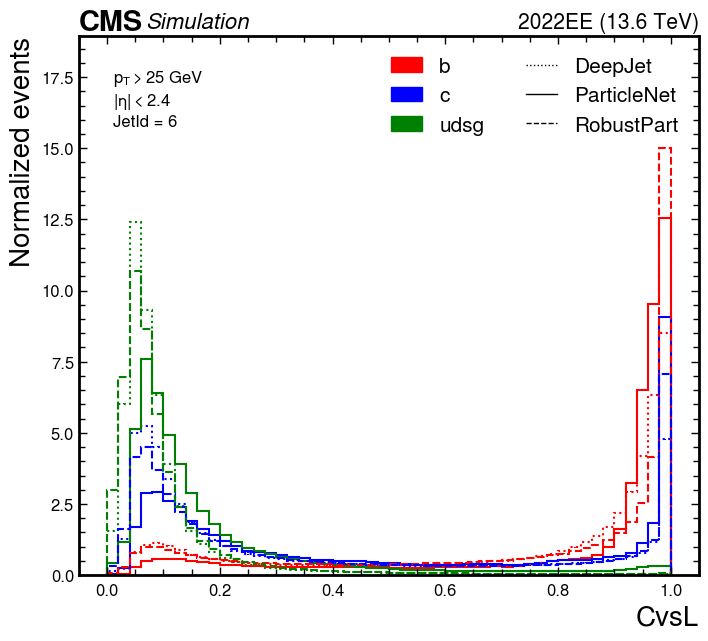

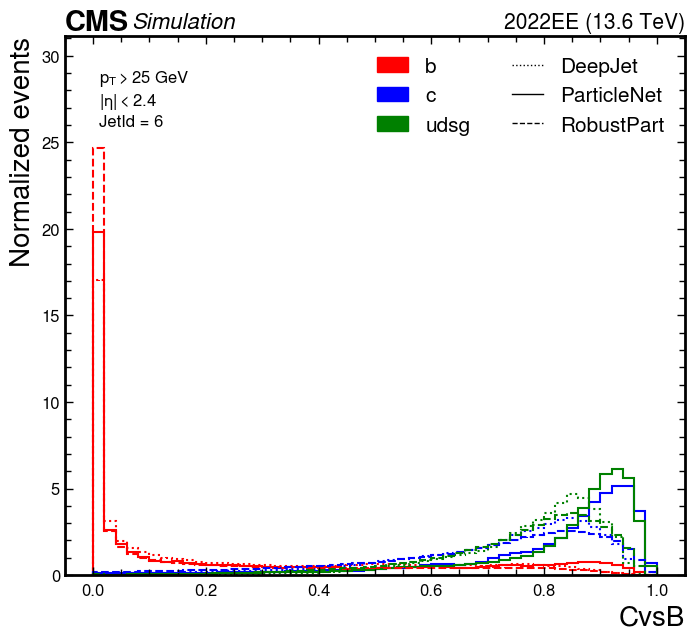

In [4]:
for axis in ["cvsl", "cvsb"]:
    fig, ax = plt.subplots(figsize=(8, 7))
    for tagger in taggers:
        for flavor in ["b", "c", "l"]:
            taggers[tagger][{"flavor": flavor_map[flavor]}].project(axis).plot1d(
                ax=ax,
                linestyle=linestyle_map[tagger],
                color=color_map[flavor],
                density=True,
                flow=None,
            )
    ax.legend(
        handles=[
            mpatches.Patch(color="r", label="b"),
            mpatches.Patch(color="b", label="c"),
            mpatches.Patch(color="g", label="udsg"),
            Line2D([0], [0], color="k", lw=1, label=tagger_map["deepjet"], linestyle="dotted"),
            Line2D([0], [0], color="k", lw=1, label=tagger_map["pnet"], linestyle="solid"),
            Line2D([0], [0], color="k", lw=1, label=tagger_map["part"], linestyle="dashed"),
        ],
        ncol=2,
        loc="upper right"
    )
    ax.set(ylabel="Normalized events")
    ylimit = ax.get_ylim()[-1]
    ax.set(ylim=(0, ylimit*1.2))
    ax.text(0.01, ylimit*1.13, '$p_T > 25$ GeV\n$|\eta| < 2.4$\nJetId = 6', fontsize=12, va='top', ha='left')
    hep.cms.lumitext("2022EE (13.6 TeV)", ax=ax)
    hep.cms.text("Simulation", ax=ax)

### ROC Curves

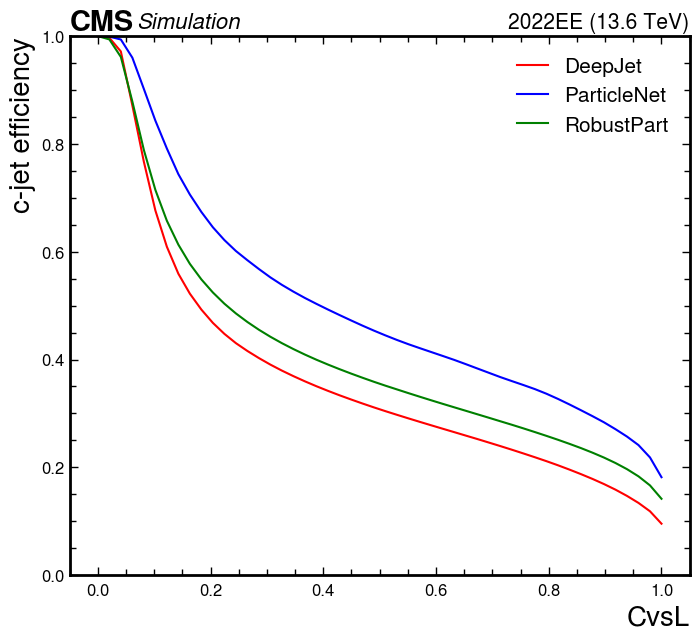

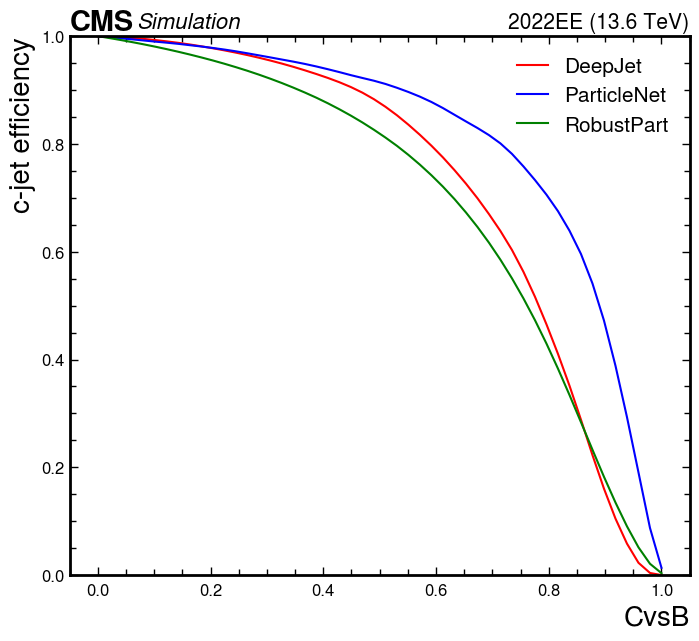

In [5]:
for axis, xlabel in  xlabel_map.items():
    fig, ax = plt.subplots(figsize=(8, 7))
    for color, (label, h) in zip(["r", "b", "g"], taggers.items()):
        values = h[{"flavor": "4"}].project(axis).values()
        roc = [
            np.sum(values[i:]) / np.sum(values)
            for i in range(len(values))
        ]
        ax.plot(np.linspace(0, 1, 50), roc, color=color, label=tagger_map[label])
    ax.legend()
    ax.set_ylabel("c-jet efficiency")
    ax.set_xlabel(xlabel)
    ax.set_ylim(0, 1)
    hep.cms.lumitext("2022EE (13.6 TeV)", ax=ax)
    hep.cms.text("Simulation", loc=0, ax=ax);